# Industrial Sensors Clustering with Dataset

This notebook applies clustering techniques to a dataset, showing how KMeans can group samples into distinct clusters.
Clustering is an unsupervised learning technique that discovers hidden structures in data without labels.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [43]:
df = pd.read_csv("industrial_sensors.csv", sep = ";", decimal=",")
X = df[["Temperature", "Pressure", "Vibration"]]
X = X.fillna(X.mean())

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
print(np.isnan(X_scaled).sum())
print(np.isinf(X_scaled).sum())

0
0


In [46]:
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    silhouette_scores.append((k, score))

print("Silhouette scores:", silhouette_scores)

best_k = max(silhouette_scores, key=lambda x: x[1])[0]
print("Best number of clusters:", best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
X["cluster"] = clusters


Silhouette scores: [(2, 0.3895584058777287), (3, 0.40254099121656567), (4, 0.44386770728247105), (5, 0.4600608833607148)]
Best number of clusters: 5


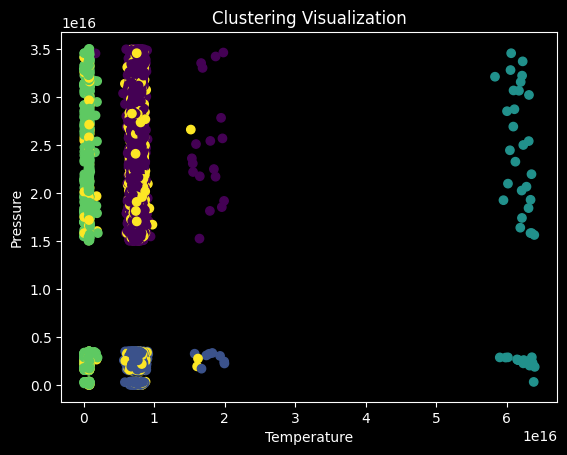

In [47]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=X["cluster"], cmap="viridis")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Clustering Visualization")
plt.show()


## Conclusion
- KMeans successfully grouped the dataset into clusters.
- Silhouette score was used to evaluate clustering quality.
- This approach can be extended to industrial sensor datasets to detect operational modes or anomalies.
